## Imports

In [1]:
# imports
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

## Load sample images

In [2]:
# Load the images
im1 = cv2.imread('../Media/images/tap_ref.png')
#im2 = cv2.imread('../data/images/cropped_GX030259_frame_023749.jpg')

## Load mediapipe model

In [3]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

In [4]:
def show_pose(im):
    results = pose.process(im)
    if results.pose_landmarks:

        mp_drawing = mp.solutions.drawing_utils
        image_with_landmarks = im.copy()
        mp_drawing.draw_landmarks(image_with_landmarks, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        image_with_landmarks = cv2.cvtColor(image_with_landmarks, cv2.COLOR_BGR2RGB)

        plt.figure(figsize = (10,10))
        plt.imshow(image_with_landmarks)
        plt.show()

    else:
        plt.figure(figsize = (10,10))
        plt.imshow(im)
        plt.show()

window_name = 'Image'
image = cv2.line(im1, (300,600), (1000,600), (0,0,255), 9)
cv2.imshow(window_name, image) 

## Test on sample images

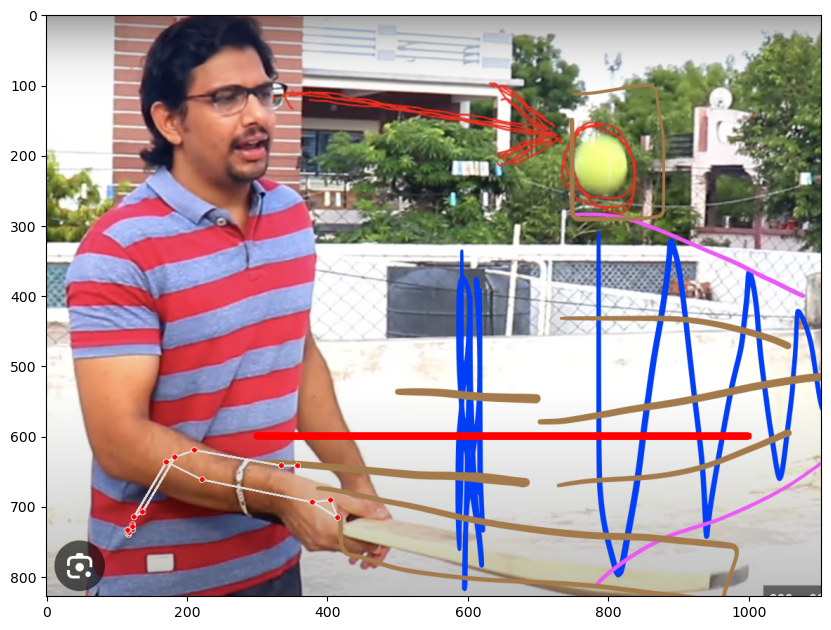

In [5]:
show_pose(im1)

## Get coordinates of each point

https://developers.google.com/mediapipe/solutions/vision/pose_landmarker

In [6]:
im = im1
h, w, c = im.shape
landmark_temp = {}

left_toe_idx = 31
left_ankle_idx = 27
right_toe_idx = 32
right_ankle_idx = 28
left_wrist_idx = 15
right_wrist_idx = 16

results = pose.process(im)
if results.pose_landmarks:
    mp_drawing = mp.solutions.drawing_utils
    image_with_landmarks = im.copy()
    mp_drawing.draw_landmarks(image_with_landmarks, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    mark = results.pose_landmarks.landmark
    landmark_temp['LEFT_FOOT_INDEX'] = mark[left_toe_idx].x*w, mark[left_toe_idx].y*h
    landmark_temp['LEFT_ANKLE'] = mark[left_ankle_idx].x*w, mark[left_ankle_idx].y*h
    landmark_temp['RIGHT_FOOT_INDEX'] = mark[right_toe_idx].x*w, mark[right_toe_idx].y*h
    landmark_temp['RIGHT_ANKLE'] = mark[right_ankle_idx].x*w, mark[right_ankle_idx].y*h
    landmark_temp['LEFT_WRIST'] = mark[left_wrist_idx].x*w, mark[left_wrist_idx].y*h
    landmark_temp['RIGHT_WRIST'] = mark[right_wrist_idx].x*w, mark[right_wrist_idx].y*h


In [7]:
print(landmark_temp)

{'LEFT_FOOT_INDEX': (435.0474886894226, 700.3665068149567), 'LEFT_ANKLE': (384.3706126213074, 677.3561317920685), 'RIGHT_FOOT_INDEX': (453.0569930076599, 723.5579073429108), 'RIGHT_ANKLE': (405.96282291412354, 710.6138434410095), 'LEFT_WRIST': (134.76556742191315, 712.0970385074615), 'RIGHT_WRIST': (215.93847155570984, 727.9614465236664)}
